# Project 3

### Scientific Question: As carnivory arose independently in plants, how genetically similar are the molecular mechanisms of Carnivory in certain carnivorous plant species?

Various plant species from Drosera adelae to Sarracenia Purpurea have evolved to derive nutrients from consuming other organisms which typically consists of arthopods.  Carnivory among plants has been known to evolved independently into 10 lineages with more than 800 species (Ellison & Adamec, 2018).

Chitinases are enzymes that break down chitin found either in the cell wall of fungi or exoskeleton of arthopods.  Many plants have evolved to utilize chitinases for resistance against fungi and insects (Salzer et al., 2000).  Class I chitinases are a class of chitinase which are characterized by a cysteine-rich N-terminal (Flach et al., 1992).  Many plants contain chitinases and I believe that carnivorous plants have repurposed or evolved a digestive function from chitinases such as class I chitinases. 

Many studies have been conducted on carnivorous plants and so gene sequences exists for many plant species and are acessible on databases such as NCBI (https://www.ncbi.nlm.nih.gov/)

### If the molecular mechanisms of these carnivorous plant species are genetically similar then digestive enzyme genes such as class 1 chitinases from these species should have similar sequences and or expression

To answer this scientific question, I had to find various FASTA files containing the nucleotide sequence coding for class 1 chitinase gene from four carnivorous plants and four non-carnivorous plants.  The four carnivorous plants I used were Drosera adelae, Nepenthes khasiana, Dionaea muscipula, and Sarracenia purpurea while the four non-carnivorous plants were Musa x paradisiaca, Oryza sativa, M.truncatula, and Vitis vinifera.  I found and downloaded these files from NCBI after performing a search in their database.  I then used performed pairwise alignment with these gene sequences, normalized the pairwise alignment score, then displayed the data on a heatmap.  If my hypothesis is correct, then the class 1 chitinase gene sequence of carnivorous plants would show high similarity and be different from those of non-carnivorous plants 

### Part 1: Load the Packages 

- os: This package allows for python to interact with the operating system.  The directory is changed to the operating system so that python is able to locate the FASTA files that are needed for this project 

- Bio: This package contains various tools useful for computational biology and bioinformatics.  I used Bio to import two functions, pairwise2 and SeqIO.  Pairwise2 was used to perform pairwise alignment and output a score for a pair of sequences while SeqIO was used to retrieve the nucleotide sequences from FASTA files.  

- Numpy: This package contains common mathematical functions which include creating multi-dimensional arrays and matrix data structures.  I used Numpy for its array capabilities which was needed for the displaying the values for the heat map.  

- matplotlib: This package contains different tools useful to data visualization.  I used matplotlib to generate a heat map and customize the parameters of the heat map from the tick labels, title and axis labels.     




In [1]:
import os
os.chdir (r"C:\Users\bv207\FASTA files for project 3")
from Bio import pairwise2
from Bio import SeqIO
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


### Part 2: Retrieve the FASTA Files 

Description: FASTA files are text-base files used for representing nucleotide or amino acid sequences.  They have a very simple format with the sequence name and comments preceding the sequence.  I had eight different FASTA files downloaded and stored in a folder within my OS.  The code below retrieves the FASTA files and comments indicate which sequence the FASTA files contained.   

In [5]:
#1 Drosera_adelae chitinase gene sequence

seq1=SeqIO.read("Drosera_adelae_Chi1_gene.fa", "fasta")
print(seq1)

#2 Nepenthes_khasiana chitinase gene sequence

seq2=SeqIO.read("Nepenthes_khasiana_basic_chitinase_1-2 gene.fa", "fasta")
print(seq2)

#3 Dionaea_muscipula chitinase gene sequence

seq3=SeqIO.read("Dionaea_muscipula_CHIT1.fa", "fasta")
print(seq3)

#4 Sarracenia_purpurea chitinase gene sequence

seq4=SeqIO.read("Sarracenia_purpurea_acidic chitinase.fa", "fasta")
print(seq4)

#5 Musa x paradisiaca chitinase (Chi-1) sequence

seq5=SeqIO.read("Musa x paradisiaca chitinase (Chi-1).fa", "fasta")
print(seq5)

#6 Oryza sativa chitinase (Rcht1) sequence

seq6=SeqIO.read("Oryza sativa chitinase (Rcht1).fa", "fasta")
print(seq6)

#7 M.truncatula mRNA for chitinase sequence

seq7=SeqIO.read("M.truncatula mRNA for chitinase.fa", "fasta")
print(seq7)

#8 Vitis vinifera chitinase class I sequence

seq8=SeqIO.read("Vitis vinifera chitinase class I.fa", "fasta")
print(seq8)


ID: dbj|LC037409.2|:1-2882
Name: dbj|LC037409.2|:1-2882
Description: dbj|LC037409.2|:1-2882 Drosera adelae Chi1 gene for class I chitinase, complete cds
Number of features: 0
Seq('CTTTCGCTCATGAATTTGCAAGGCCATGCACACGTTATGTCCTCTTGTCAAACT...AAT')
ID: gb|AY618883.1|:1-1717
Name: gb|AY618883.1|:1-1717
Description: gb|AY618883.1|:1-1717 Nepenthes khasiana basic chitinase 1-2 gene, complete cds
Number of features: 0
Seq('ATGAATGCTCCGTGCTTCTGCTTCCATGCACAAAAAATGCGAAACCACAAGCAC...TGA')
ID: gb|AY643484.1|:1-234
Name: gb|AY643484.1|:1-234
Description: gb|AY643484.1|:1-234 Dionaea muscipula CHIT1 (chit1) gene, partial cds
Number of features: 0
Seq('AACTGCAACTATGGGCAATGCGGCGAGAGCATCGGTCAACCACTGTTGGCAAAT...AAC')
ID: dbj|LC129261.1|:1-900
Name: dbj|LC129261.1|:1-900
Description: dbj|LC129261.1|:1-900 Sarracenia purpurea subsp. venosa mRNA for acidic chitinase, complete cds
Number of features: 0
Seq('ATGGCAACAAAACCTCAACCCGCCACCCTTCTTCTCTTCTCCCTCCTCTTCCTA...TGA')
ID: gb|AY997529.2|:1-1082
Name: gb|AY9975

### Part 3: Perform Pairwise Alignment and Normalized the Scores 

I created a for loop which performed pairwise alignment for each sequence against itself and every other sequence.  I then normalized the scores by multiplying each score by 100 and dividing the scores by the sequence length.  The for loop was designed so that the score would be divided by the larger sequence of the pairwise alignment.  Once the scores were placed into the numpy array I then rounded each value so it would look more appealing in the subsequent heatmap.

In [3]:
seqs=[seq1,seq2,seq3,seq4,seq5,seq6,seq7,seq8]

alignment = np.empty(shape=(8,8))
for a in range(len(seqs)): 
    for b in range(len(seqs)):
        if len(seqs[a].seq) >= len(seqs[b].seq):
            print(len(seqs[a].seq))
            alignment[a,b]=(pairwise2.align.globalxx(seqs[a].seq,seqs[b].seq, score_only=True)*100)/len(seqs[a].seq)
        elif len(seqs[b].seq) >= len(seqs[a].seq):
            print(len(seqs[b].seq))
            alignment[a,b]=(pairwise2.align.globalxx(seqs[a].seq,seqs[b].seq, score_only=True)*100)/len(seqs[b].seq)           

rounded_alignment=np.around(alignment, 2) 
print(rounded_alignment)

2882
2882
2882
2882
2882
2882
2882
2882
2882
1717
1717
1717
1717
1717
1717
1717
2882
1717
234
900
1082
1204
1315
945
2882
1717
900
900
1082
1204
1315
945
2882
1717
1082
1082
1082
1204
1315
1082
2882
1717
1204
1204
1204
1204
1315
1204
2882
1717
1315
1315
1315
1315
1315
1315
2882
1717
945
945
1082
1204
1315
945
[[100.    48.02   8.12  29.81  33.73  36.22  40.11  31.33]
 [ 48.02 100.    13.63  43.16  47.64  50.03  54.22  44.73]
 [  8.12  13.63 100.    25.44  21.53  19.44  17.79  24.66]
 [ 29.81  43.16  25.44 100.    57.76  54.98  50.27  61.59]
 [ 33.73  47.64  21.53  57.76 100.    73.42  57.49  64.42]
 [ 36.22  50.03  19.44  54.98  73.42 100.    62.36  58.97]
 [ 40.11  54.22  17.79  50.27  57.49  62.36 100.    56.58]
 [ 31.33  44.73  24.66  61.59  64.42  58.97  56.58 100.  ]]


# 

### Part 4: Create a Heatmap with the normalized Pairwise Alignment Scores 

Using matplotlib and the array containing all the rounded normalized pairwise alignment score, I created a heat plot to see if my data contained any insight.  A heat map is a data visualization technique that can be used to show similarity or difference in magnitude which is represented by variation in hue or intensity.  In this instance a high score represented by lighter intensity indicates similarity while a low score represented by a darker intensity indicates difference.      

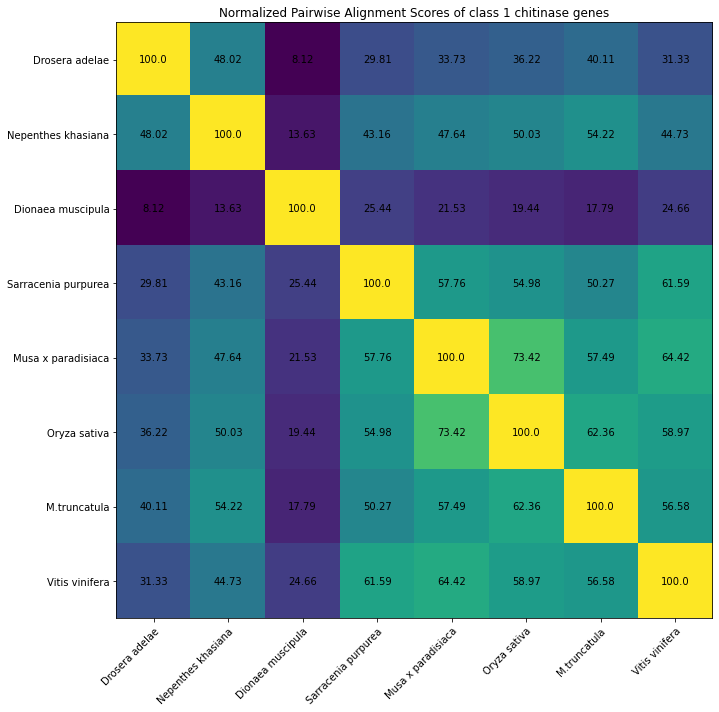

In [6]:
Plant = ["Drosera adelae", "Nepenthes khasiana", "Dionaea muscipula", "Sarracenia purpurea", "Musa x paradisiaca","Oryza sativa","M.truncatula","Vitis vinifera"]
Plant = ["Drosera adelae", "Nepenthes khasiana", "Dionaea muscipula", "Sarracenia purpurea", "Musa x paradisiaca","Oryza sativa","M.truncatula","Vitis vinifera"]

scores = rounded_alignment


fig, ax = plt.subplots(figsize=(20, 10))
im = ax.imshow(scores)


ax.set_xticks(np.arange(len(Plant)))
ax.set_yticks(np.arange(len(Plant)))

ax.set_xticklabels(Plant)
ax.set_yticklabels(Plant)


plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(Plant)):
    for j in range(len(Plant)):
        text = ax.text(j, i, scores[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Normalized Pairwise Alignment Scores of class 1 chitinase genes")
fig.tight_layout()
plt.show()

### Part 5: Analysis of the Results 

From the plot, 64 scores are displayed which represent the similarity of sequences between two plant species.  The diagonals are all 100 because they represent the similarity between a gene and itself.  It appears that class 1 chitinase gene sequences from the plants analyzed do not show any indication that there is a differences between carnivorous and non-carnivorous plants nor is there a high resemblance among carnivorous class 1 chitinases.  Dionaea muscipula showed a lower alignment score most likely due to the sequence utilized contained a partial cds.  From these results, it appears that my hypothesis is incorrect with class I chitinases but that does not necessarily mean other plant enzymes are similar in carnivorous plants but distinct in non-carnivorous plants.  Only a few species were anaylzed and so a larger sample size of plant species might have different results.     